# Theory Part
CIFAR-10 Images 60000, 32X32, RGB
<br>
10 classes X 6000 Images
* 50000 training, 10000 testing
* CNN models

# Step #0 Problem Statement

CIFAR-10
* Airplanes
* Cars
* Birds
* Cats
* Deers
* Dogs
* Frogs
* Horses
* Ships
* Trucks

# Step #1 Import Libraries/Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

2022-12-23 01:57:54.660233: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-23 01:57:54.839947: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-23 01:57:55.628700: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2022-12-23 01:57:55.628796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'li

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

# Step #2 Viualize Data

[4]


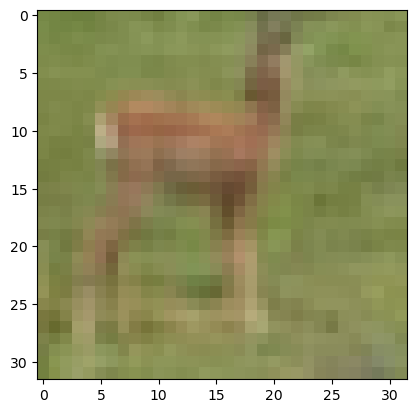

In [7]:
import random
num = random.randrange(1,50000)
plt.imshow(X_train[num])
print(y_train[num])


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


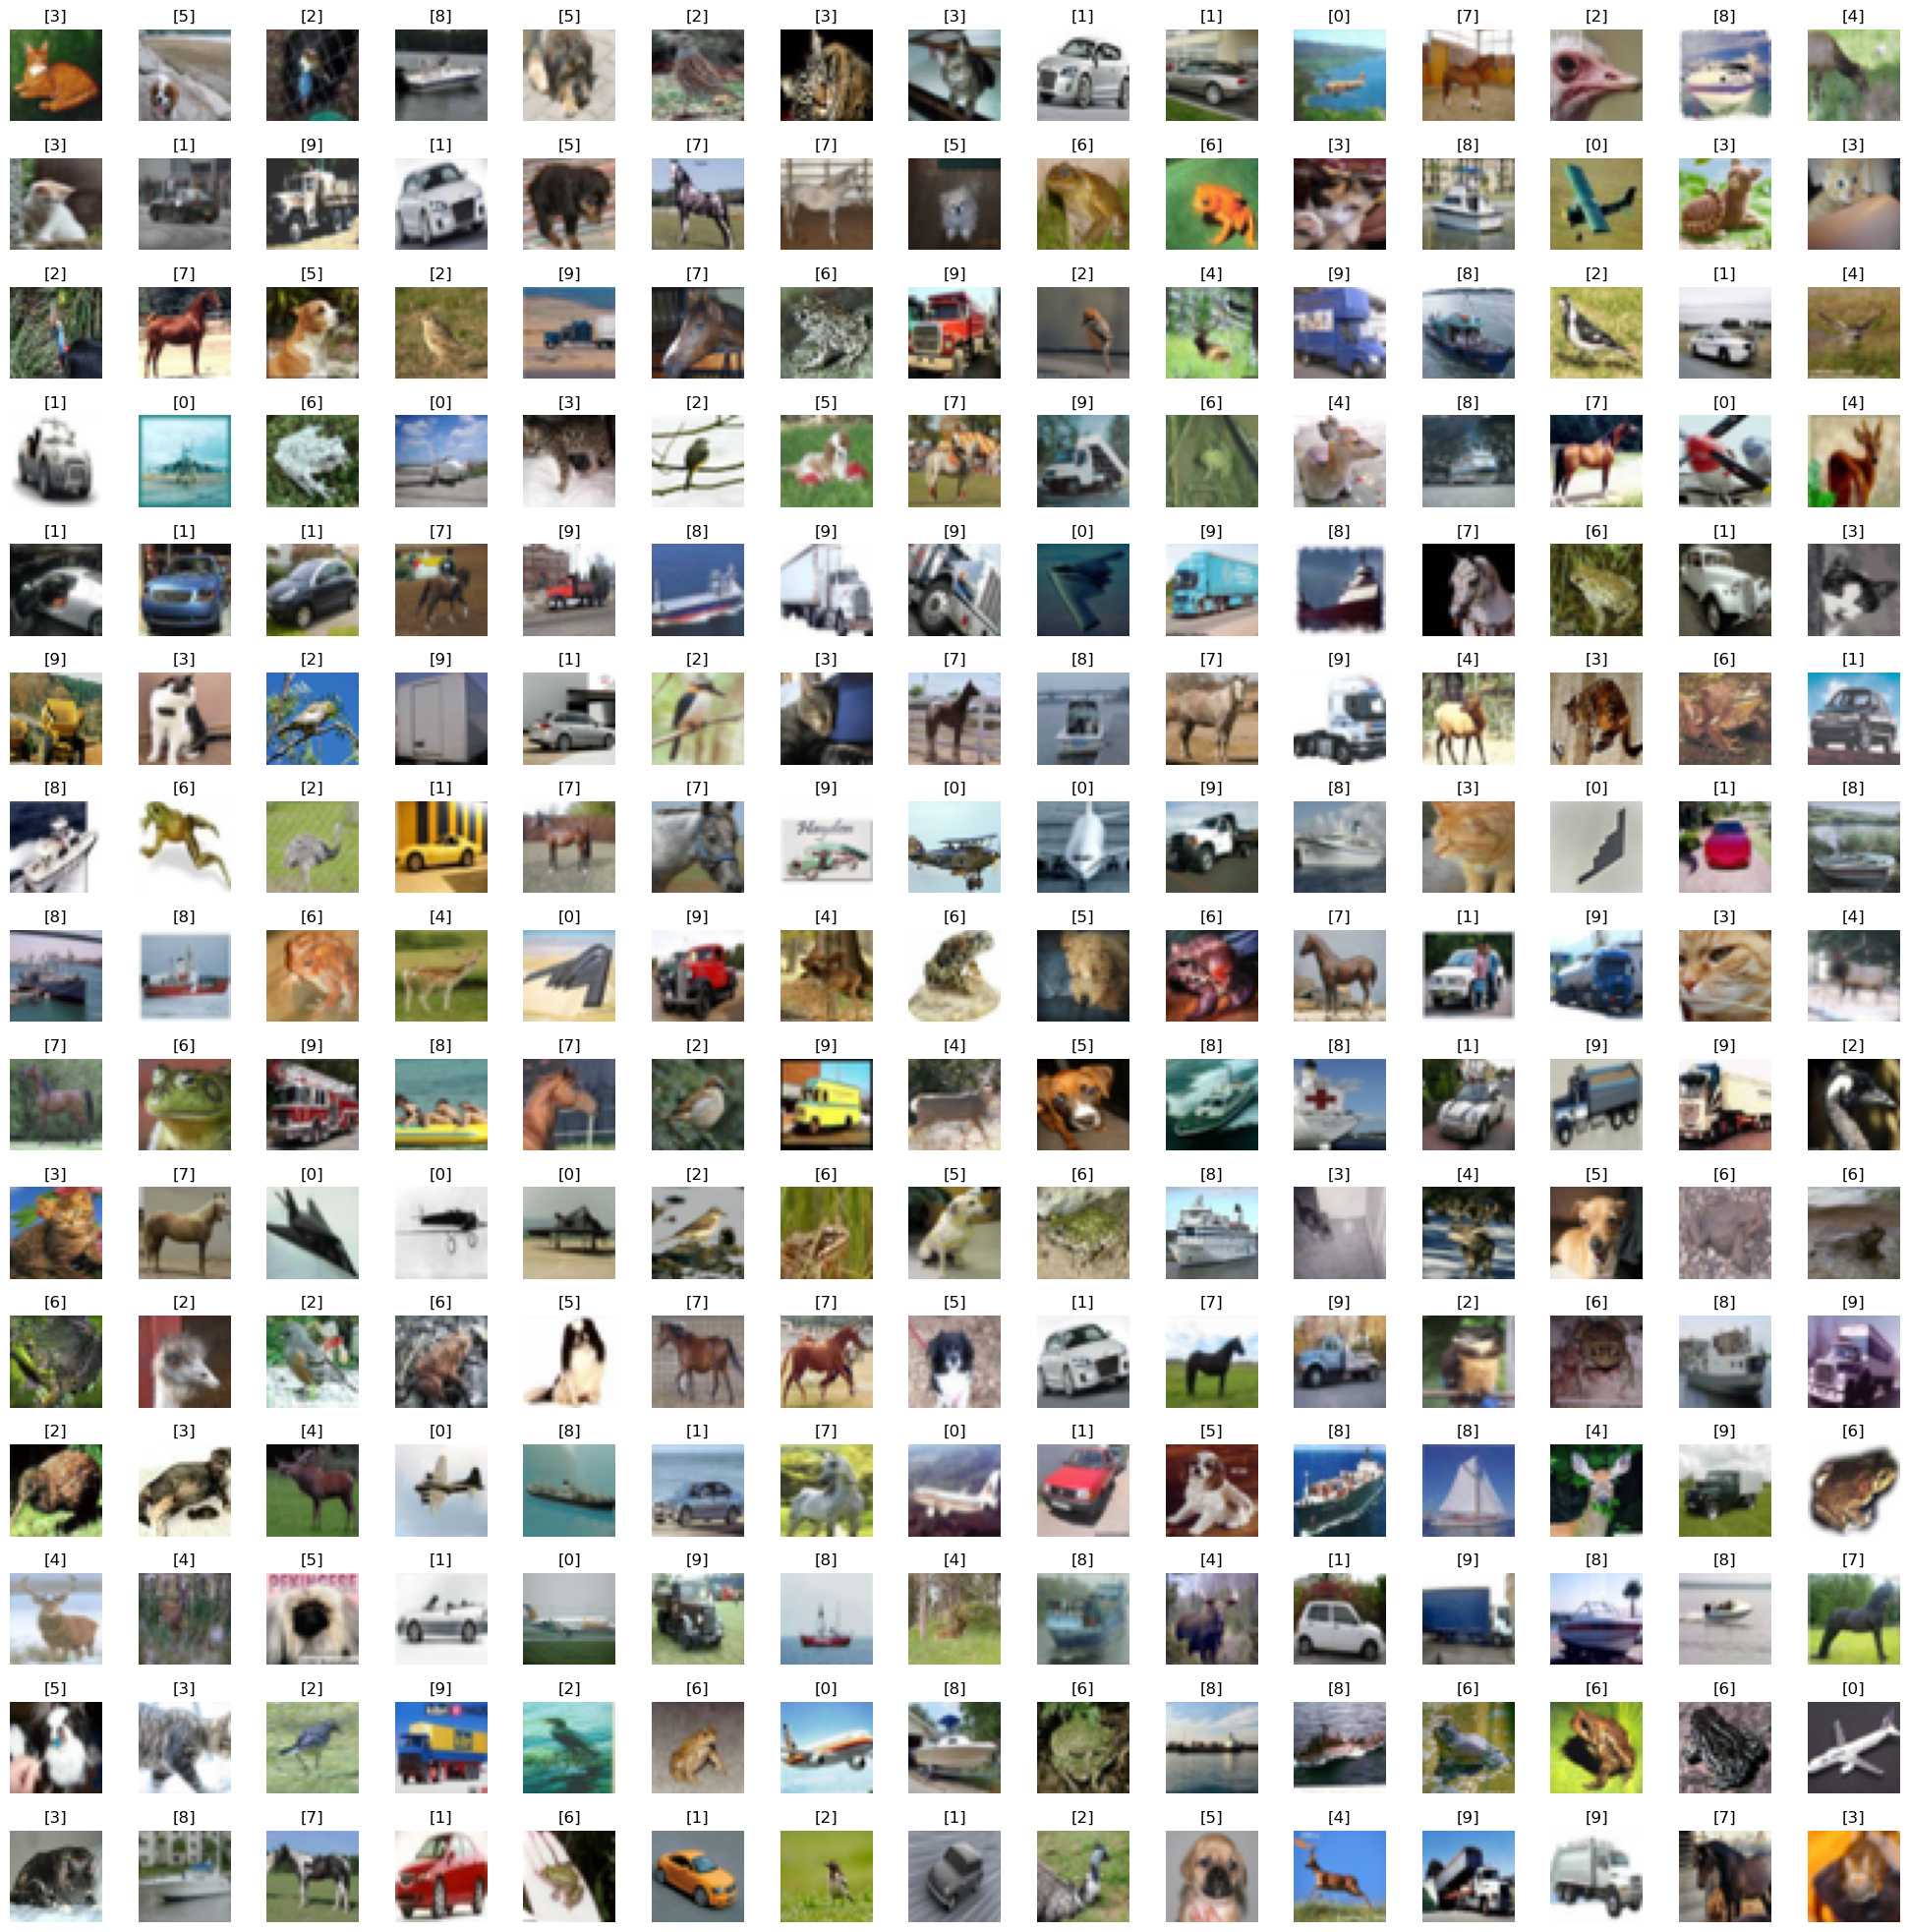

In [8]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (25, 25)) #subplot 15x15 패치, 그림은 25 x 25
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #불러올 사진의 인덱스
    axes[i].imshow(X_train[index]) # 그 사진을 패치마다 추가해줌
    axes[i].set_title(y_train[index]) #사진위에 실제 인덱스 숫자 넣어줌
    axes[i].axis('off') # x축과 y축의 숫자 제거
plt.subplots_adjust(hspace = 0.4) #그림사이에 간격 주려고

# Step #3 Data Preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
number_cat = 10 #number of category

In [11]:
y_train #이진법으로 변환할 것

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat) # category를 one-hot encoding하는 것
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
y_test = keras.utils.to_categorical(y_test, number_cat) # category를 one-hot encoding하는 것
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [14]:
# Normalize할 것임
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train.shape

(50000, 32, 32, 3)

In [16]:
Input_shape = X_train.shape[1:] #sample 개수 skip하여 슬라이싱
Input_shape

(32, 32, 3)

# Step #4 Train the Model

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam, RMSprop
from keras.callbacks import TensorBoard

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2, 2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 1024, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

2022-12-23 01:58:17.142047: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:58:17.153093: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:58:17.154909: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-23 01:58:17.157129: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [19]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'] )

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history = cnn_model.fit(X_train, y_train, batch_size = 16, epochs = 10, shuffle = True)

Epoch 1/10


2022-12-23 01:58:21.659670: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8200


3125/3125 [==============================] - 20s 5ms/step - loss: 1.6186 - accuracy: 0.4180
Epoch 2/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.3881 - accuracy: 0.5225
Epoch 3/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.3185 - accuracy: 0.5519
Epoch 4/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2779 - accuracy: 0.5688
Epoch 5/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2729 - accuracy: 0.5726
Epoch 6/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2643 - accuracy: 0.5799
Epoch 7/10
3125/3125 [==============================] - 17s 6ms/step - loss: 1.2526 - accuracy: 0.5881
Epoch 8/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2693 - accuracy: 0.5805
Epoch 9/10
3125/3125 [==============================] - 17s 5ms/step - loss: 1.2586 - accuracy: 0.5843
Epoch 10/10
3125/3125 [==============================] - 16s 5ms/step - loss: 1.2727

# Step #5 Evaluate the Model

In [21]:
X_test.shape

(10000, 32, 32, 3)

In [22]:
y_test.shape

(10000, 10)

In [23]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.1926 - accuracy: 0.5962
Test Accuracy : 0.5961999893188477


In [24]:
y_prob = cnn_model.predict(X_test)
predicted_class = y_prob.argmax(axis=-1)

313/313 [==============================] - 1s 2ms/step


In [25]:
predicted_class

array([3, 8, 8, ..., 5, 1, 4])

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
y_test = y_test.argmax(1) #10진법 형태로 되돌림

In [28]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [29]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_class[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

<AxesSubplot:>

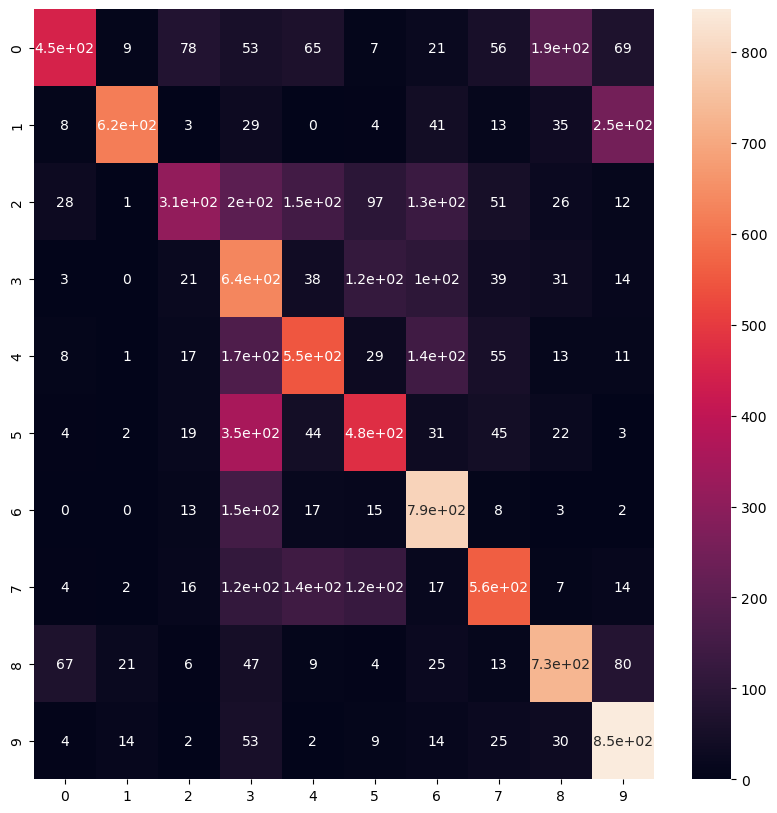

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_class)

plt.figure(figsize= (10,10))
sns.heatmap(cm, annot=True)


# Step #6 Saving the Model

In [31]:
import os
directory = os.path.join(os.getcwd(), 'saved_models') #getcwd()는 주피터 모델이 돌아가고 있는 저장소 구해줌

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)